In [2]:
pwd()
using Pkg; Pkg.activate("../../../FermiCG/")
using FermiCG, NPZ, JLD2
using Plots
using PyCall
using Printf

readdir()

  Activating environment at `~/code/FermiCG/Project.toml`


3-element Vector{String}:
 ".ipynb_checkpoints"
 "ccsd_scan.ipynb"
 "traj.xyz"

In [3]:
molecule = "
He        -0.00000        0.00000       -0.38918
He        -0.00000        0.00000       -2.44940
He         1.24424        0.90399        0.56771
He         1.24424       -0.90399        0.56771
He        -0.47526        1.46269        0.56771
He        -0.47526       -1.46269        0.56771
He        -1.53796        0.00000        0.56771
"
atoms = []
for (li,line) in enumerate(split(rstrip(lstrip(molecule)), "\n"))
    l = split(line)
    push!(atoms, Atom(li, l[1], parse.(Float64,l[2:4])))
end

basis = "aug-cc-pvdz"
# 
# Create FermiCG.Molecule type
mol     = Molecule(0, 1, atoms,basis);


pyscf = pyimport("pyscf")
# pyscf.lib.num_threads(1)


pymol = pyscf.gto.Mole(atom=molecule,
    symmetry = false, spin =0,charge=0,
    basis = basis)

pymol.build()
mf = pyscf.scf.RHF(pymol)
mf.verbose = 4
mf.conv_tol = 1e-8
mf.conv_tol_grad = 1e-5
mf.run(max_cycle=200)

rdm_mf = mf.make_rdm1()

@printf(" Hartree-Fock Energy: %12.8f", mf.e_tot)
pyscfcc = pyimport("pyscf.cc")

mycc = pyscfcc.CCSD(mf).run()
@printf("CCSD total energy    %12.8f\n", mycc.e_tot)
et = mycc.ccsd_t()
@printf("CCSD(T) total energy %12.8f\n", mycc.e_tot + et)




******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-08
SCF conv_tol_grad = 1e-05
SCF max_cycles = 200
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /var/folders/td/qpnnxwv93pq0t7bbdkh5rvzr0000gn/T/tmpdydtyahg
max_memory 4000 MB (current use 0 MB)
init E= -20.0807533092219
  HOMO = -0.825285561444749  LUMO = 0.154221288012213
cycle= 1 E= -19.9420267944925  delta_E= 0.139  |g|= 0.0302  |ddm|= 0.408
  HOMO = -0.860096225221932  LUMO = 0.154729375883514
cycle= 2 E= -19.9423074354917  delta_E= -0.000281  |g|= 0.0054  |ddm|= 0.0301
  HOMO = -0.860043352068966  LUMO = 0.154764466989331
cycle= 3 E= -19.9423181440666  delta_E= -1.07e-05  |g|= 0.000178  |ddm|= 0.00769
  HOMO = -0.860016621611455  LUMO = 0.154764950374236
cycle= 4 E= -19.9423181557108  delta_E= -1.16e-08  |g|= 1.31e-05  |ddm|= 0.000457
  HOMO = 

    7

    He      -0.0000000000000000       0.0000000000000000      -0.4086390000000000 
    He      -0.0000000000000000       0.0000000000000000      -2.5718700000000001 
    He       1.3064520000000002       0.9491895000000000       0.5960955000000001 
    He       1.3064520000000002      -0.9491895000000000       0.5960955000000001 
    He      -0.4990230000000000       1.5358245000000001       0.5960955000000001 
    He      -0.4990230000000000      -1.5358245000000001       0.5960955000000001 
    He      -1.6148580000000001       0.0000000000000000       0.5960955000000001 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-08
SCF conv_tol_grad = 1e-08
SCF max_cycles = 200
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /var/folders/td/qpnnxwv93pq0t7bbdkh5rvzr0000gn/T/tmpvfr_0gi_
max_memory 400

 Hartree-Fock Energy: -19.97998886E(CCSD) = -20.21920290545143  E_corr = -0.2392140455222347
CCSD total energy    -20.21920291
CCSD(T) correction = -0.000162175112548926
CCSD(T) total energy -20.21936508
    7

    He      -0.0000000000000000       0.0000000000000000      -0.4864750000000000 
    He      -0.0000000000000000       0.0000000000000000      -3.0617500000000000 
    He       1.5552999999999999       1.1299874999999999       0.7096375000000000 
    He       1.5552999999999999      -1.1299874999999999       0.7096375000000000 
    He      -0.5940750000000000       1.8283625000000001       0.7096375000000000 
    He      -0.5940750000000000      -1.8283625000000001       0.7096375000000000 
    He      -1.9224500000000000       0.0000000000000000       0.7096375000000000 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_

 Hartree-Fock Energy: -19.98806413E(CCSD) = -20.22622666511946  E_corr = -0.2381625354442596
CCSD total energy    -20.22622667
CCSD(T) correction = -7.52980456517064e-05
CCSD(T) total energy -20.22630196
    7

    He      -0.0000000000000000       0.0000000000000000      -0.5643110000000000 
    He      -0.0000000000000000       0.0000000000000000      -3.5516299999999994 
    He       1.8041479999999999       1.3107854999999999       0.8231795000000001 
    He       1.8041479999999999      -1.3107854999999999       0.8231795000000001 
    He      -0.6891270000000000       2.1209004999999999       0.8231795000000001 
    He      -0.6891270000000000      -2.1209004999999999       0.8231795000000001 
    He      -2.2300420000000001       0.0000000000000000       0.8231795000000001 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_

 Hartree-Fock Energy: -19.98970895E(CCSD) = -20.2272785821311  E_corr = -0.2375696297368229
CCSD total energy    -20.22727858
CCSD(T) correction = -3.50612695542967e-05
CCSD(T) total energy -20.22731364
    7

    He      -0.0000000000000000       0.0000000000000000      -0.6421470000000000 
    He      -0.0000000000000000       0.0000000000000000      -4.0415099999999997 
    He       2.0529959999999998       1.4915835000000000       0.9367215000000000 
    He       2.0529959999999998      -1.4915835000000000       0.9367215000000000 
    He      -0.7841790000000000       2.4134384999999998       0.9367215000000000 
    He      -0.7841790000000000      -2.4134384999999998       0.9367215000000000 
    He      -2.5376339999999997       0.0000000000000000       0.9367215000000000 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_t

 Hartree-Fock Energy: -19.98994072E(CCSD) = -20.2271970938961  E_corr = -0.2372563693672787
CCSD total energy    -20.22719709
CCSD(T) correction = -1.70978946239584e-05
CCSD(T) total energy -20.22721419
    7

    He      -0.0000000000000000       0.0000000000000000      -0.7199830000000000 
    He      -0.0000000000000000       0.0000000000000000      -4.5313900000000000 
    He       2.3018440000000000       1.6723815000000000       1.0502635000000002 
    He       2.3018440000000000      -1.6723815000000000       1.0502635000000002 
    He      -0.8792310000000001       2.7059765000000002       1.0502635000000002 
    He      -0.8792310000000001      -2.7059765000000002       1.0502635000000002 
    He      -2.8452260000000003       0.0000000000000000       1.0502635000000002 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_t

 Hartree-Fock Energy: -19.98994288E(CCSD) = -20.22704252199517  E_corr = -0.2370996451182369
CCSD total energy    -20.22704252
CCSD(T) correction = -8.91578020986838e-06
CCSD(T) total energy -20.22705144
    7

    He      -0.0000000000000000       0.0000000000000000      -0.7978189999999999 
    He      -0.0000000000000000       0.0000000000000000      -5.0212699999999995 
    He       2.5506919999999997       1.8531794999999998       1.1638055000000000 
    He       2.5506919999999997      -1.8531794999999998       1.1638055000000000 
    He      -0.9742829999999999       2.9985144999999997       1.1638055000000000 
    He      -0.9742829999999999      -2.9985144999999997       1.1638055000000000 
    He      -3.1528179999999999       0.0000000000000000       1.1638055000000000 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_

 Hartree-Fock Energy: -19.98993748E(CCSD) = -20.22695456742307  E_corr = -0.2370170873360251
CCSD total energy    -20.22695457
CCSD(T) correction = -4.96480261733664e-06
CCSD(T) total energy -20.22695953
    7

    He      -0.0000000000000000       0.0000000000000000      -0.8756550000000001 
    He      -0.0000000000000000       0.0000000000000000      -5.5111499999999998 
    He       2.7995399999999999       2.0339774999999998       1.2773475000000001 
    He       2.7995399999999999      -2.0339774999999998       1.2773475000000001 
    He      -1.0693350000000001       3.2910525000000002       1.2773475000000001 
    He      -1.0693350000000001      -3.2910525000000002       1.2773475000000001 
    He      -3.4604100000000000       0.0000000000000000       1.2773475000000001 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_

 Hartree-Fock Energy: -19.98993500E(CCSD) = -20.22690600065782  E_corr = -0.2369709960556163
CCSD total energy    -20.22690600
CCSD(T) correction = -2.9223569395647e-06
CCSD(T) total energy -20.22690892
    7

    He      -0.0000000000000000       0.0000000000000000      -0.9534910000000001 
    He      -0.0000000000000000       0.0000000000000000      -6.0010300000000001 
    He       3.0483880000000001       2.2147755000000000       1.3908895000000001 
    He       3.0483880000000001      -2.2147755000000000       1.3908895000000001 
    He      -1.1643870000000001       3.5835905000000006       1.3908895000000001 
    He      -1.1643870000000001      -3.5835905000000006       1.3908895000000001 
    He      -3.7680020000000001       0.0000000000000000       1.3908895000000001 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_t

 Hartree-Fock Energy: -19.98993359E(CCSD) = -20.22687838819986  E_corr = -0.2369447998469252
CCSD total energy    -20.22687839
CCSD(T) correction = -1.79997517822022e-06
CCSD(T) total energy -20.22688019
    7

    He      -0.0000000000000000       0.0000000000000000      -1.0313270000000001 
    He      -0.0000000000000000       0.0000000000000000      -6.4909100000000004 
    He       3.2972360000000003       2.3955735000000002       1.5044315000000004 
    He       3.2972360000000003      -2.3955735000000002       1.5044315000000004 
    He      -1.2594390000000002       3.8761285000000005       1.5044315000000004 
    He      -1.2594390000000002      -3.8761285000000005       1.5044315000000004 
    He      -4.0755940000000006       0.0000000000000000       1.5044315000000004 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_

 Hartree-Fock Energy: -19.98993310E(CCSD) = -20.22686289078037  E_corr = -0.2369297945557142
CCSD total energy    -20.22686289
CCSD(T) correction = -1.15112139403808e-06
CCSD(T) total energy -20.22686404
    7

    He      -0.0000000000000000       0.0000000000000000      -1.1091630000000001 
    He      -0.0000000000000000       0.0000000000000000      -6.9807899999999998 
    He       3.5460840000000000       2.5763715000000000       1.6179735000000002 
    He       3.5460840000000000      -2.5763715000000000       1.6179735000000002 
    He      -1.3544910000000001       4.1686665000000005       1.6179735000000002 
    He      -1.3544910000000001      -4.1686665000000005       1.6179735000000002 
    He      -4.3831860000000002       0.0000000000000000       1.6179735000000002 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_

 Hartree-Fock Energy: -19.98993295E(CCSD) = -20.22685406099654  E_corr = -0.2369211106514319
CCSD total energy    -20.22685406
CCSD(T) correction = -7.59919060489275e-07
CCSD(T) total energy -20.22685482


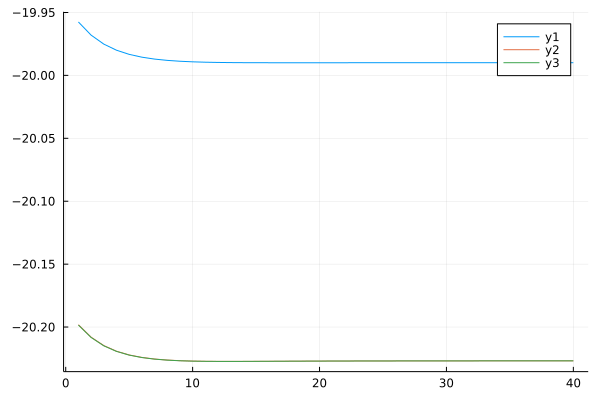

In [4]:
n_steps = 40
step_size = .05

pymol_init = pyscf.gto.Mole(atom=molecule,
    symmetry = false, spin =0,charge=0,
    basis = basis)
pymol.build()


io = open("traj.xyz", "w");
energies_scf = []
energies_ccsd = []
energies_ccsdt = []

for R in 1:n_steps

    pymol = deepcopy(pymol_init)
    scale = 1+R*step_size

    xyz = @sprintf("%5i\n\n", length(mol.atoms))
    tmp = []
    for a in mol.atoms
        push!(tmp, ["He", (a.xyz[1]*scale, a.xyz[2]*scale, a.xyz[3]*scale)])
        xyz = xyz * @sprintf("%6s %24.16f %24.16f %24.16f \n", a.symbol, a.xyz[1]*scale, a.xyz[2]*scale, a.xyz[3]*scale)
    end
    pymol.atom = tmp
    pymol.build()
    
    
    println(xyz)
    write(io, xyz);
   
    
#     println(pymol.format_atom(1))
    
    #     mol_R = Molecule(0, 1, [a[0]pymol.atom, pymol.basis)


    mf = pyscf.scf.RHF(pymol)
    mf.verbose = 4
    mf.conv_tol = 1e-8
    mf.conv_tol_grad = 1e-8
    mf.run(max_cycle=200)

    rdm_mf = mf.make_rdm1()
    @printf(" Hartree-Fock Energy: %12.8f", mf.e_tot)

    push!(energies_scf, mf.e_tot)
    
    pyscfcc = pyimport("pyscf.cc")

    mycc = pyscfcc.CCSD(mf).run()
    @printf("CCSD total energy    %12.8f\n", mycc.e_tot)
    
    et = mycc.ccsd_t()
    @printf("CCSD(T) total energy %12.8f\n", mycc.e_tot + et)

    
    push!(energies_ccsd, mycc.e_tot)
    push!(energies_ccsdt, mycc.e_tot+et)

end
close(io);
plot([energies_scf, energies_ccsd, energies_ccsdt])

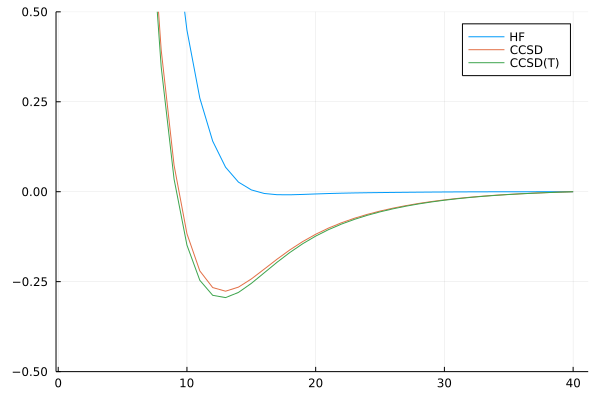

In [5]:
plot([energies_scf.-energies_scf[end], energies_ccsd.-energies_ccsd[end], energies_ccsdt.-energies_ccsdt[end]]*627.51, 
labels = ["HF" "CCSD" "CCSD(T)"])
ylims!((-.5,.5))